# Thunderstruck
## Spinup Diagnostics

In [1]:
from dataclasses import dataclass, field

import iris
import matplotlib.pyplot as plt
import numpy as np
import paths
from aeolus.calc import spatial_mean, time_mean, toa_net_energy
from aeolus.coord import get_cube_rel_days, roll_cube_pm180
from aeolus.core import AtmoSim
from aeolus.model import um
from aeolus.plot import (
    all_sim_file_label,
    figsave,
    hcross,
    subplot_label_generator,
    tex2cf_units,
    timeseries_1d,
)
from tqdm.notebook import tqdm

In [2]:
from common import GROUPS, KW_LINE_MARKERS, SIMULATIONS

In [3]:
show_sim = [*SIMULATIONS.keys()]

In [4]:
dset = {}
for sim_label in tqdm(show_sim):
    dset[sim_label] = iris.load(
        paths.data
        / "raw"
        / "spinup"
        / SIMULATIONS[sim_label].highres_spinup_suite
        / "base"
        / SIMULATIONS[sim_label].resolution
        / "umglaa.pa*"
    )

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
@dataclass
class Diag:
    recipe: callable
    title: str
    units: str


DIAGS = {
    "t_sfc": Diag(
        recipe=lambda cl: spatial_mean(cl.extract_cube(um.t_sfc)),
        title="Surface Temperature",
        units="$K$",
    ),
    "toa_net": Diag(
        recipe=lambda cl: spatial_mean(toa_net_energy(cl)),
        title="TOA Net Downward Energy",
        units="$W$ $m^{-2}$",
    ),
    "p_sfc": Diag(
        recipe=lambda cl: spatial_mean(cl.extract_cube(um.p_sfc)),
        title="Surface Pressure",
        units="$bar$",
    ),
}

Saved to ../figures/drafts/thunderstruck__hab1_hab2_archean_early_archean_late_hab1_0p25bar_hab1_0p5bar_hab1_1bar_hab1_2bar_hab1_4bar_hab1_10bar__toa_net__gm.png
Size: 234.5 KB


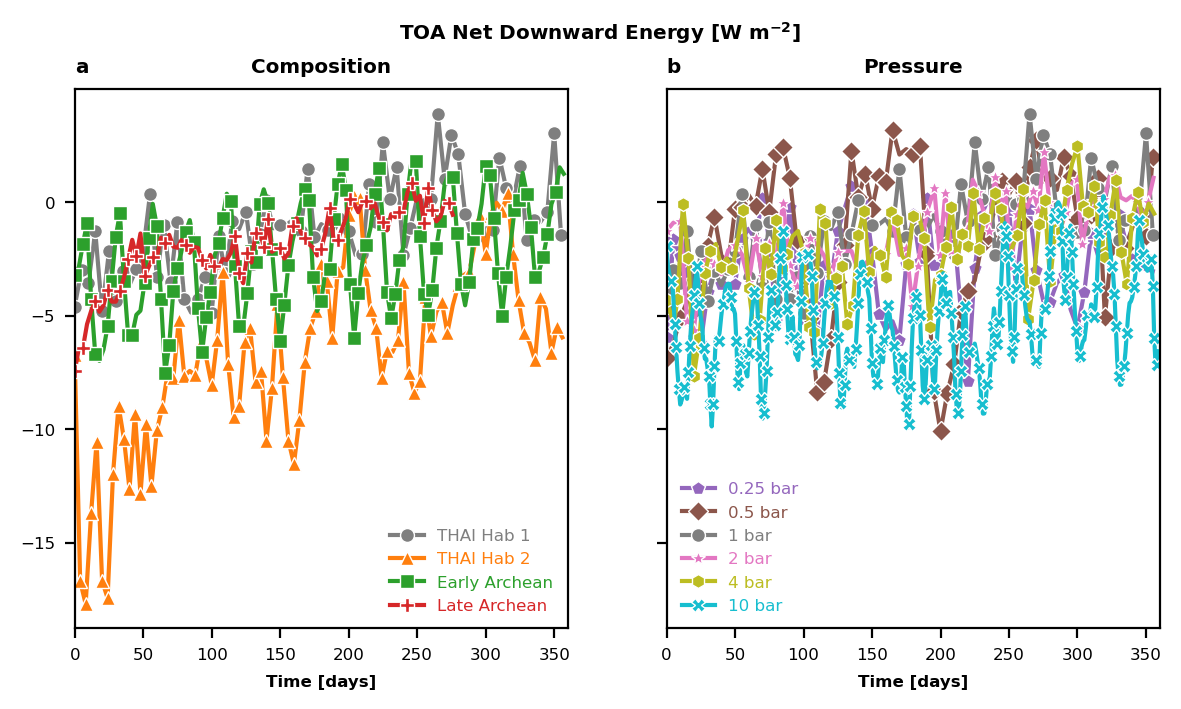

In [8]:
diag_key = "toa_net"

fig = plt.figure()
fig.suptitle(f"{DIAGS[diag_key].title} [{DIAGS[diag_key].units}]", fontweight="bold")

axd = fig.subplot_mosaic([[*GROUPS.keys()]], sharey=True)

iletters = subplot_label_generator()
for group in GROUPS.keys():
    for sim_label in GROUPS[group].simulations:
        cube = DIAGS[diag_key].recipe(dset[sim_label])
        cube.convert_units(tex2cf_units(DIAGS[diag_key].units))
        timeseries_1d(
            cube,
            ax=axd[group],
            label=SIMULATIONS[sim_label].title,
            **KW_LINE_MARKERS,
            **SIMULATIONS[sim_label].kw_plt,
        )
    axd[group].set_xlabel(
        "Time [days]",
        fontdict={"weight": "bold"},
    )
    axd[group].set_title(
        GROUPS[group].title,
        fontdict={"weight": "bold"},
    )
    axd[group].set_title(
        f"{next(iletters)}",
        loc="left",
        fontdict={"weight": "bold"},
    )
    axd[group].legend(frameon=False)
    axd[group].set_xlim(0, 360)
figsave(
    fig,
    paths.figures
    / "drafts"
    / f"thunderstruck_{all_sim_file_label(show_sim)}__{diag_key}__gm",
)

In [9]:
100441 * 240 / 86400

279.0027777777778

In [12]:
dset

{'hab1': [<iris 'Cube' of surface_air_pressure / (Pa) (time: 72; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of surface_temperature / (K) (time: 72; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of surface_upward_water_flux / (kg m-2 s-1) (time: 72; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 72; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 72; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of toa_outgoing_shortwave_flux / (W m-2) (time: 72; latitude: 1920; longitude: 2560)>],
 'hab2': [<iris 'Cube' of surface_air_pressure / (Pa) (time: 90; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of surface_temperature / (K) (time: 90; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of surface_upward_water_flux / (kg m-2 s-1) (time: 90; latitude: 1920; longitude: 2560)>,
 <iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 90; latitude: 1920; longitude: 2560)>,
 <iris 'Cu

<Axes: >

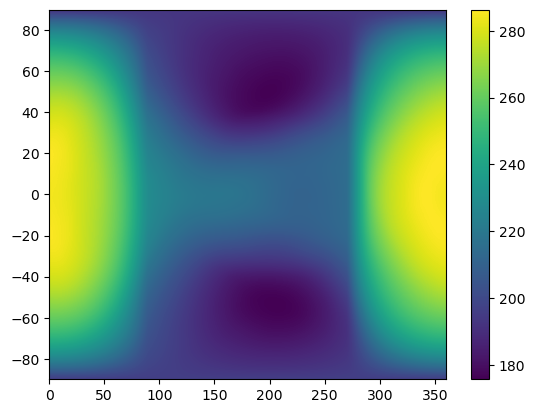

In [26]:
hcross(time_mean(dset.extract_cube(um.t_sfc)))

In [2]:
n_res = "n96"

In [3]:
simulations = {
    "10_bar_ctrl": {
        "folder": "cq708",
        "title": "10 bar; dsa_ar10bar",
        "kw_plt": {"color": "C0"},
    },
    "10_bar_dsa": {"folder": "cq708_dsa", "title": "dsa", "kw_plt": {"color": "C1"}},
    "10_bar_etw_mt": {
        "folder": "cq708_etw_mt",
        "title": "etw_cia_turbet",
        "kw_plt": {"color": "C2"},
    },
    "10_bar_pref1e5": {
        "folder": "cq708_pref1e5",
        "title": "pref=1e5",
        "kw_plt": {"color": "C3"},
    },
}

# simulations = {
#     "aqua": {"folder": "co730", "title": "Aqua", "kw_plt": {"color": "C0"}},
#     "b2": {"folder": "cp922_lsm_rect_cont_b2", "title": "B2", "kw_plt": {"color": "C1"}},
#     "b8": {"folder": "cp922_lsm_rect_cont_b8", "title": "B8", "kw_plt": {"color": "C2"}},
#     "e4": {"folder": "cp922_lsm_rect_cont_e4", "title": "E4", "kw_plt": {"color": "C3"}},
# }

In [4]:
runs = {}
for sim_key, sim_prop in simulations.items():
    cl = iris.load(
        paths.data / "spinup" / sim_prop["folder"] / "base" / n_res / "umglaa.pa*"
    )
    runs[sim_key] = AtmoSim(cubes=cl, planet="trap1e")

In [5]:
[*enumerate(cl)]

[(0,
  <iris 'Cube' of precipitation_flux / (kg m-2 s-1) (time: 61; latitude: 144; longitude: 192)>),
 (1,
  <iris 'Cube' of surface_temperature / (K) (time: 61; latitude: 144; longitude: 192)>),
 (2,
  <iris 'Cube' of surface_upward_water_flux / (kg m-2 s-1) (time: 61; latitude: 144; longitude: 192)>),
 (3,
  <iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 61; latitude: 144; longitude: 192)>),
 (4,
  <iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 61; latitude: 144; longitude: 192)>),
 (5,
  <iris 'Cube' of toa_outgoing_shortwave_flux / (W m-2) (time: 61; latitude: 144; longitude: 192)>)]

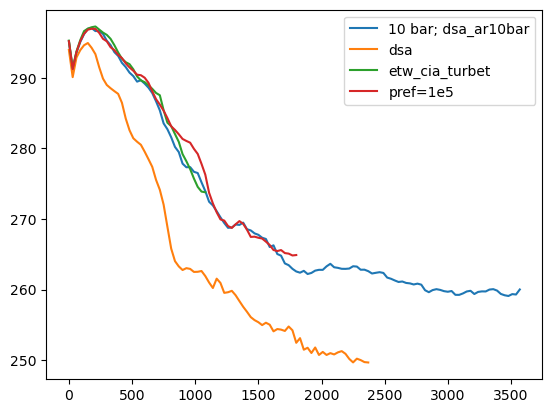

In [8]:
fig, ax = plt.subplots()
for sim_key, sim_prop in simulations.items():
    run = runs[sim_key]
    ax.plot(
        get_cube_rel_days(run._ref_tyx),
        spatial_mean(run.t_sfc).data,
        label=sim_prop["title"],
        **sim_prop["kw_plt"]
    )
# ax.set_ylim(-5, 5)
ax.legend()

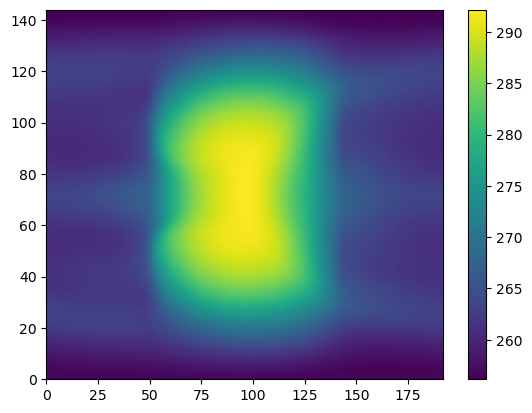

In [14]:
cube = time_mean(runs["10_bar_ctrl"].t_sfc.copy())
for coord in [um.x, um.y]:
    cube.coord(coord).bounds = None
plt.pcolormesh(roll_cube_pm180(cube).data)
plt.colorbar()

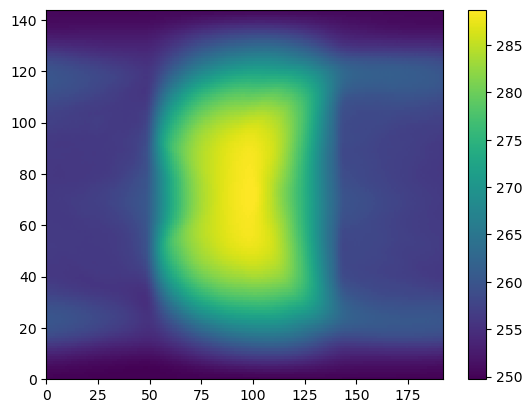

In [15]:
cube = time_mean(runs["10_bar_dsa"].t_sfc.copy())
for coord in [um.x, um.y]:
    cube.coord(coord).bounds = None
plt.pcolormesh(roll_cube_pm180(cube).data)
plt.colorbar()

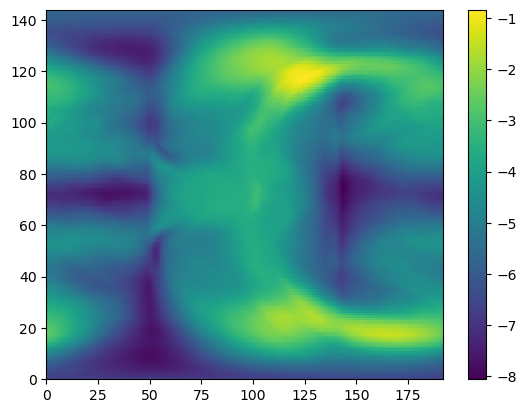

In [16]:
cube = time_mean(runs["10_bar_dsa"].t_sfc.copy()) - time_mean(
    runs["10_bar_ctrl"].t_sfc.copy()
)
for coord in [um.x, um.y]:
    cube.coord(coord).bounds = None
plt.pcolormesh(roll_cube_pm180(cube).data)
plt.colorbar()